In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import precision_recall_curve
from matplotlib import pyplot
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import f1_score
from sklearn.metrics import auc

In [278]:
df = pd.read_csv('DataScience-Data.csv')
df.head()

,MEMBER_ID,LOB,Voluntary,churned,Tenure,hadGap.,Age,SDOHScore,conditionScore,substanceScore,physFrailtyScore,mentalFrailtyScore,EDCost,EDCount,IPCost,IPCount,State
0,7ea90bb64201ddaf463eb9419ad990d9,LOB2,NaN,0,49,0,59,0.018738,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,PA
1,6319ce06253302493c1fe5d57d57aba7,LOB1,NaN,0,49,0,80,0.012270,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,PA
2,e7c98ad14a283b1bb751dd73b76f1ef9,LOB1,NaN,0,49,0,45,0.000435,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,PA
3,6189fb5bf21454cb7c01f15cb1bb78ec,LOB4,NaN,0,49,0,25,0.033174,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NC
4,8793004f217e16c695b043fa78b9c74b,LOB5,NaN,0,49,0,66,0.405166,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,OH


In [279]:
df.shape

(76995, 17)

# Removing Duplicate Member_ID rows

In [280]:
print("There are ",df.shape[0]- len(df['MEMBER_ID'].unique())," members for whom member id is not unique")

There are  4806  members for whom member id is not unique


In [281]:
print(df[df.duplicated(subset=['MEMBER_ID'],keep=False)])

                              MEMBER_ID   LOB                       Voluntary  \
62     e76c6488074d133c5878dccb780c2969  LOB1                       Voluntary   
63     e76c6488074d133c5878dccb780c2969  LOB1                             NaN   
582    e5467ea8f90726966cb867494b2b73c0  LOB1                       Voluntary   
583    e5467ea8f90726966cb867494b2b73c0  LOB1                             NaN   
664    90a43963e0f38151f4534f919a502f01  LOB1                       Voluntary   
...                                 ...   ...                             ...   
76950  df6305d7143a7a4eb3e3f25a0e420436  LOB1                             NaN   
76959  9631c11dcd0f990c08a9c1a89831f634  LOB1                       Voluntary   
76960  9631c11dcd0f990c08a9c1a89831f634  LOB1                             NaN   
76962  f2abd8dda33d586e0e181a804a5e1692  LOB1  Involuntary - Medicare / Other   
76963  f2abd8dda33d586e0e181a804a5e1692  LOB1                       Voluntary   

       churned  Tenure  had

There are 2 kinds of duplicates:
    1. All the fields are the same
    2. For some members, they have 2 rows one with churn and other without churn. Given the data it is not possible to determine which row information is correct, since rest of the variables are the same.
    Hence removing both the rows. 

In [282]:
print("len before",len(df))
df.drop_duplicates(subset=['MEMBER_ID','churned'],inplace= True)
print("len after", len(df))

len before 76995
len after 75716


In [283]:
print(df[df.duplicated(subset=['MEMBER_ID'],keep=False)])

                              MEMBER_ID   LOB          Voluntary  churned  \
62     e76c6488074d133c5878dccb780c2969  LOB1          Voluntary        1   
63     e76c6488074d133c5878dccb780c2969  LOB1                NaN        0   
582    e5467ea8f90726966cb867494b2b73c0  LOB1          Voluntary        1   
583    e5467ea8f90726966cb867494b2b73c0  LOB1                NaN        0   
664    90a43963e0f38151f4534f919a502f01  LOB1          Voluntary        1   
...                                 ...   ...                ...      ...   
76941  d859ec4e596a8a1d660bc1f32adbbcda  LOB1                NaN        0   
76949  df6305d7143a7a4eb3e3f25a0e420436  LOB1  Involuntary - SNP        1   
76950  df6305d7143a7a4eb3e3f25a0e420436  LOB1                NaN        0   
76959  9631c11dcd0f990c08a9c1a89831f634  LOB1          Voluntary        1   
76960  9631c11dcd0f990c08a9c1a89831f634  LOB1                NaN        0   

       Tenure  hadGap.  Age  SDOHScore  conditionScore  substanceScore  \
6

In [284]:
df = df[~(df.duplicated(subset=['MEMBER_ID'],keep=False))]
df.head()

,MEMBER_ID,LOB,Voluntary,churned,Tenure,hadGap.,Age,SDOHScore,conditionScore,substanceScore,physFrailtyScore,mentalFrailtyScore,EDCost,EDCount,IPCost,IPCount,State
0,7ea90bb64201ddaf463eb9419ad990d9,LOB2,NaN,0,49,0,59,0.018738,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,PA
1,6319ce06253302493c1fe5d57d57aba7,LOB1,NaN,0,49,0,80,0.012270,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,PA
2,e7c98ad14a283b1bb751dd73b76f1ef9,LOB1,NaN,0,49,0,45,0.000435,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,PA
3,6189fb5bf21454cb7c01f15cb1bb78ec,LOB4,NaN,0,49,0,25,0.033174,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NC
4,8793004f217e16c695b043fa78b9c74b,LOB5,NaN,0,49,0,66,0.405166,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,OH


In [285]:
df[df.duplicated(subset=['MEMBER_ID'],keep=False)]

,MEMBER_ID,LOB,Voluntary,churned,Tenure,hadGap.,Age,SDOHScore,conditionScore,substanceScore,physFrailtyScore,mentalFrailtyScore,EDCost,EDCount,IPCost,IPCount,State


No more duplicates present

# Some Data Statistics

Customers who Voluntarily move out of the policy vs customers who are removed Involuntarily might have different behaviours. If the 
behaviour is significantly different then we need to build different models for each category because otherwise, it would impact the importance of other independent variables in the model.

In [299]:
df.groupby(['Voluntary']).mean()

,churned,Tenure,hadGap.,Age,SDOHScore,conditionScore,substanceScore,physFrailtyScore,mentalFrailtyScore,EDCost,EDCount,IPCost,IPCount
Voluntary,,,,,,,,,,,,,
Involuntary - Medicare / Other,1.0,1086.361833,0.093545,64.859308,0.216962,0.273396,0.132211,0.153394,0.277456,2626.434817,3.940420,29314.338752,2.812867
Involuntary - SNP,1.0,892.209687,0.132479,57.058974,0.231896,0.140000,0.081481,0.066287,0.224074,2476.364066,4.246285,9785.341752,1.180998
Voluntary,1.0,809.245561,0.126462,63.370204,0.323657,0.157588,0.077725,0.073384,0.207146,2102.471138,3.579423,7291.172803,0.915363


We check the distribution now

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f82b2558d68>,
      dtype=object)

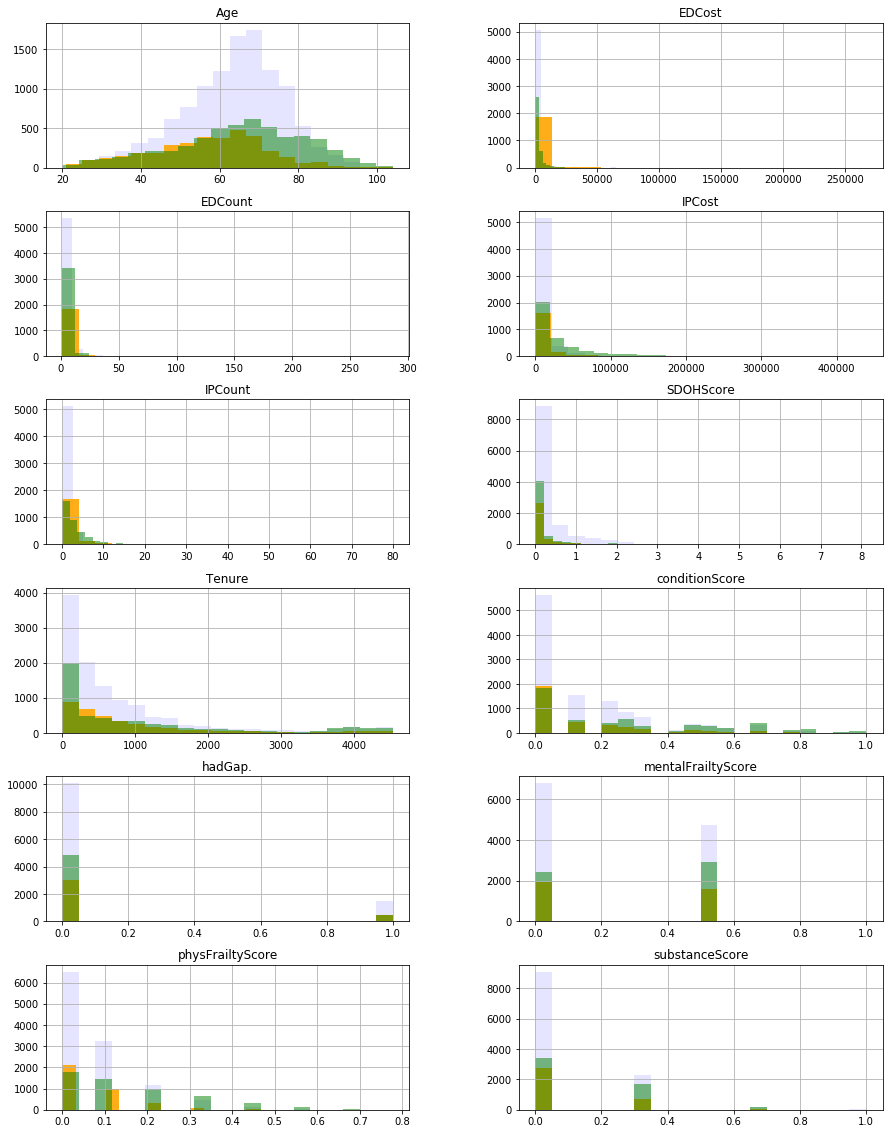

In [297]:
numerical_features = ['Tenure','Age','hadGap.','SDOHScore','conditionScore','substanceScore','physFrailtyScore','mentalFrailtyScore','EDCost','EDCount','IPCost','IPCount']
fig, ax = plt.subplots(6, 2, figsize=(15, 20))
df[df.Voluntary == 'Voluntary'][numerical_features].hist(bins=20, color="blue", alpha = 0.1,ax=ax)
df[df.Voluntary == 'Involuntary - SNP'][numerical_features].hist(bins=20, color="orange", alpha=0.9, ax=ax)
df[df.Voluntary == 'Involuntary - Medicare / Other'][numerical_features].hist(bins=20, color="green", alpha=0.5, ax=ax)

The distribution seems quite the same, hence they can be considered in one category

In [251]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
churned,68662.0,0.297108,0.456988,0.0,0.000000,0.000000,1.000000,1.000000
Tenure,68662.0,1493.395707,1402.059200,0.0,365.000000,1022.000000,2148.000000,4552.000000
hadGap.,68662.0,0.103303,0.304357,0.0,0.000000,0.000000,0.000000,1.000000
Age,68662.0,60.402260,14.727583,15.0,52.000000,62.000000,70.000000,107.000000
SDOHScore,68662.0,0.256783,0.512485,0.0,0.003747,0.031304,0.277867,8.115451
conditionScore,68662.0,0.180840,0.215924,0.0,0.000000,0.150000,0.300000,1.000000
substanceScore,68662.0,0.073898,0.151158,0.0,0.000000,0.000000,0.000000,1.000000
physFrailtyScore,68662.0,0.075359,0.104102,0.0,0.000000,0.000000,0.111111,0.777778
mentalFrailtyScore,68662.0,0.218702,0.249426,0.0,0.000000,0.000000,0.500000,1.000000
EDCost,59475.0,962.456593,2696.646516,0.0,0.000000,50.030000,962.520000,267123.170000


No negative values are present. 

In [252]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 68662 entries, 0 to 76994
Data columns (total 17 columns):
MEMBER_ID             68662 non-null object
LOB                   68662 non-null object
Voluntary             20400 non-null object
churned               68662 non-null int64
Tenure                68662 non-null int64
hadGap.               68662 non-null int64
Age                   68662 non-null int64
SDOHScore             68662 non-null float64
conditionScore        68662 non-null float64
substanceScore        68662 non-null float64
physFrailtyScore      68662 non-null float64
mentalFrailtyScore    68662 non-null float64
EDCost                59475 non-null float64
EDCount               59475 non-null float64
IPCost                59475 non-null float64
IPCount               59475 non-null float64
State                 68662 non-null object
dtypes: float64(9), int64(4), object(4)
memory usage: 9.4+ MB


To check which columns have null values

In [253]:
df.isnull().sum()/len(df)*100

MEMBER_ID              0.000000
LOB                    0.000000
Voluntary             70.289243
churned                0.000000
Tenure                 0.000000
hadGap.                0.000000
Age                    0.000000
SDOHScore              0.000000
conditionScore         0.000000
substanceScore         0.000000
physFrailtyScore       0.000000
mentalFrailtyScore     0.000000
EDCost                13.380036
EDCount               13.380036
IPCost                13.380036
IPCount               13.380036
State                  0.000000
dtype: float64

All the rows where EDCost, EDCount, IPCost and IPCount are missing belong to churned category. 
This is interesting to note and it could be because the data which is coming from a source might miss those values.

In [254]:
df['Voluntary'].value_counts()

Voluntary                         11545
Involuntary - Medicare / Other     5345
Involuntary - SNP                  3510
Name: Voluntary, dtype: int64

In [255]:
df.drop(['Voluntary'], inplace = True, axis =1)

This plot shows percentage of churned Vs not churned customers

<BarContainer object of 1 artists>

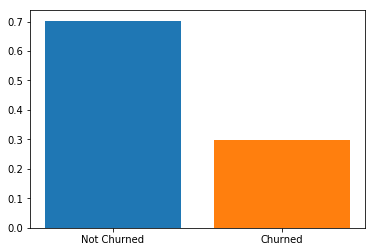

In [256]:
plt.bar(x='Not Churned',height = df['churned'].value_counts()[0]/len(df))
plt.bar(x='Churned',height = df['churned'].value_counts()[1]/len(df))

The class distribution of data is roughly 70:30, which is highly imbalanced. 

# Now checking each column for outliers

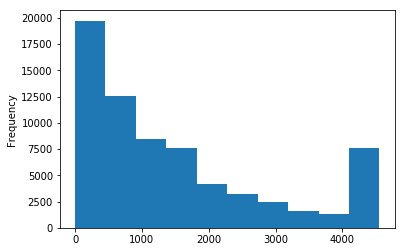

In [257]:
df['Tenure'].plot.hist()

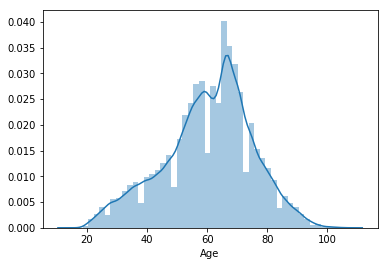

In [258]:
sns.distplot(df['Age']) #Uniform Distribution

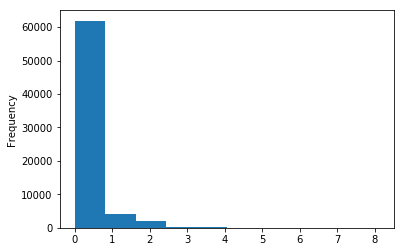

In [259]:
df['SDOHScore'].plot.hist()

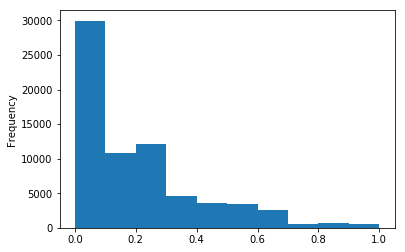

In [260]:
df['conditionScore'].plot.hist()

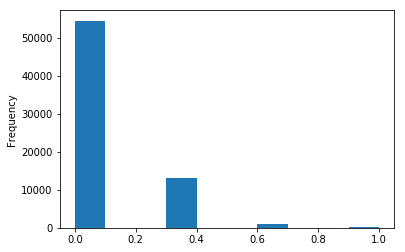

In [261]:
df['substanceScore'].plot.hist()

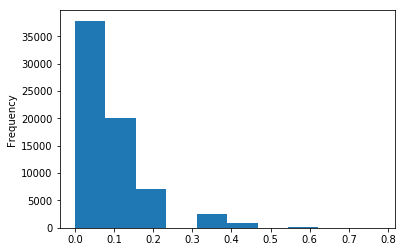

In [262]:
df['physFrailtyScore'].plot.hist()

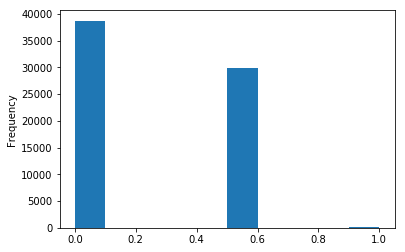

In [263]:
df['mentalFrailtyScore'].plot.hist()

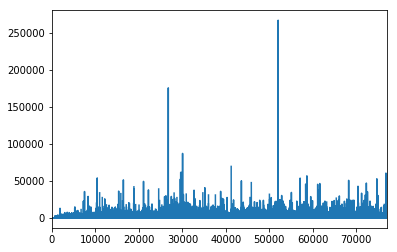

In [264]:
df['EDCost'].plot()

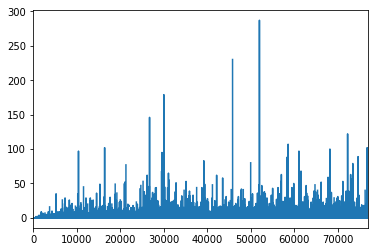

In [265]:
df['EDCount'].plot()

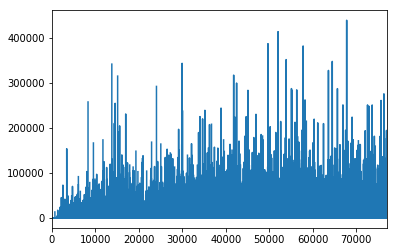

In [266]:
df['IPCost'].plot()

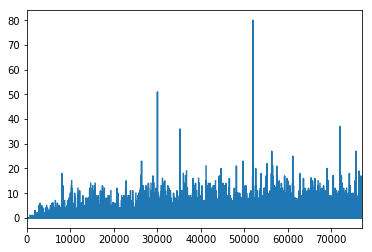

In [267]:
df['IPCount'].plot()

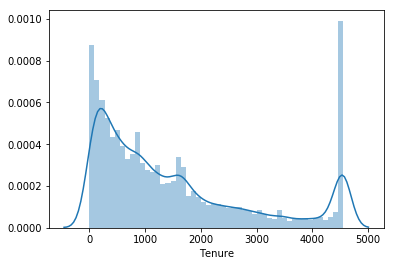

In [268]:
sns.distplot(df['Tenure'])

In [269]:
df_nan = df[df.isnull().any(axis=1)]
df_nan['churned'].value_counts()

1    9187
Name: churned, dtype: int64

In [270]:
df.dropna(inplace = True, axis =0)
len(df)

59475

From the above 4 plots we can see that there are few outliers in the dataset which should be removed

In [300]:


df[(df['EDCost'] > 150000) | (df['EDCount'] > 200) | (df['IPCount'] > 50)]

,MEMBER_ID,LOB,Voluntary,churned,Tenure,hadGap.,Age,SDOHScore,conditionScore,substanceScore,physFrailtyScore,mentalFrailtyScore,EDCost,EDCount,IPCost,IPCount,State
26756,d40c260e73443a7f85f5c43ac76b3dc0,LOB2,Involuntary - SNP,1,487,0,56,0.302383,0.45,0.666667,0.111111,0.5,175711.51,146.0,23700.09,13.0,PA
30040,6d8f4783dd459a968ab01842870de942,LOB5,Voluntary,1,791,0,40,0.007350,0.50,1.000000,0.333333,0.5,87161.20,179.0,238436.75,51.0,OH
45845,e4d77cd71199a20b5f059f3e8326045c,LOB1,Involuntary - Medicare / Other,1,669,1,55,0.180501,0.35,0.333333,0.111111,0.5,47680.47,230.0,17638.41,2.0,PA
52026,b0624deabeb6fc4b78a084323259d1ad,LOB1,Involuntary - SNP,1,5,0,46,1.776484,0.55,0.666667,0.333333,0.5,267123.17,287.0,413591.80,80.0,PA


Removing these 4 outliers

In [274]:
df = df[~((df['EDCost'] > 150000) | (df['EDCount'] > 200) | (df['IPCount'] > 50))]
len(df)

59471

The members who have some missing information, all belong to churn category

<BarContainer object of 1 artists>

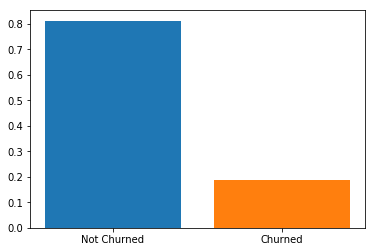

In [275]:
plt.bar(x='Not Churned',height = df['churned'].value_counts()[0]/len(df))
plt.bar(x='Churned',height = df['churned'].value_counts()[1]/len(df))

In [276]:
df['churned'].value_counts()/len(df)

0    0.811522
1    0.188478
Name: churned, dtype: float64

# Checking relationship between Each Variable and Churn

In [277]:
df.groupby('churned').mean()

,Tenure,hadGap.,Age,SDOHScore,conditionScore,substanceScore,physFrailtyScore,mentalFrailtyScore,EDCost,EDCount,IPCost,IPCount
churned,,,,,,,,,,,,
0,1745.856699,0.096722,59.441818,0.247006,0.179122,0.065973,0.067850,0.214568,644.182018,1.005719,2137.704461,0.248995
1,1072.667945,0.138906,61.809885,0.271434,0.240026,0.133434,0.123879,0.291819,2281.641266,3.732804,14675.206188,1.552502


Observations made from the above statistics

1. The avergae age of customers who churned is higher than customers who didn't churn. However, the difference between the two is not high
2. The average tenure duration is higher for customers who didn't churn than curned customers. That means, if a customer is staying for a long period of time with the insurance company, then chances of them not churning increases.
3. When customers are more prone to substance abuse, they are likely to churn.
4. When customers long term health condition is not good, they are likely to churn.
5. When customers have higher Physical and Mental Frailty score, then they are more likely to churn. 
6. Customers are more likely to churn, when their hospital visits and cost to the insurance company is high. That means, customers who are visiting hospitals more frequently are more likely to leave the insurance company.

Overall, the customers who have a history of substance abuse, long term physical, mental issues and have high hospital visits and incur a lot of amount to the insurance company, then those customers are more likely to churn.

Plotting Churned Vs Not-Churned against Age

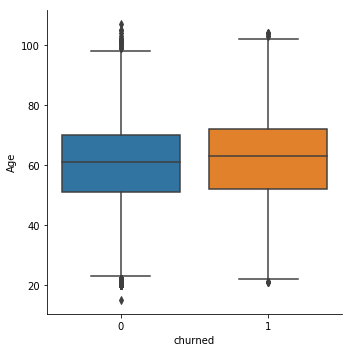

In [35]:
sns.catplot(x="churned", y="Age", kind="box", data=df)

The median age for both the categories is the almost the same. Hence it can not be considered a very good distinguishing factor while trying to predict churn.

Hence, by looking at age we cannot decide whether a customer will churn or not.

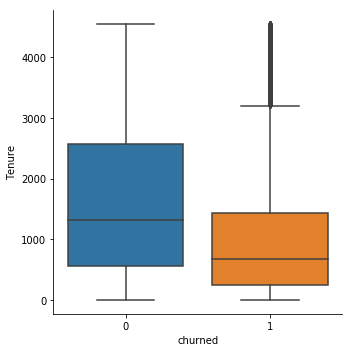

In [36]:
sns.catplot(x="churned", y="Tenure", kind="box", data=df)

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f82cbd82b00>,
      dtype=object)

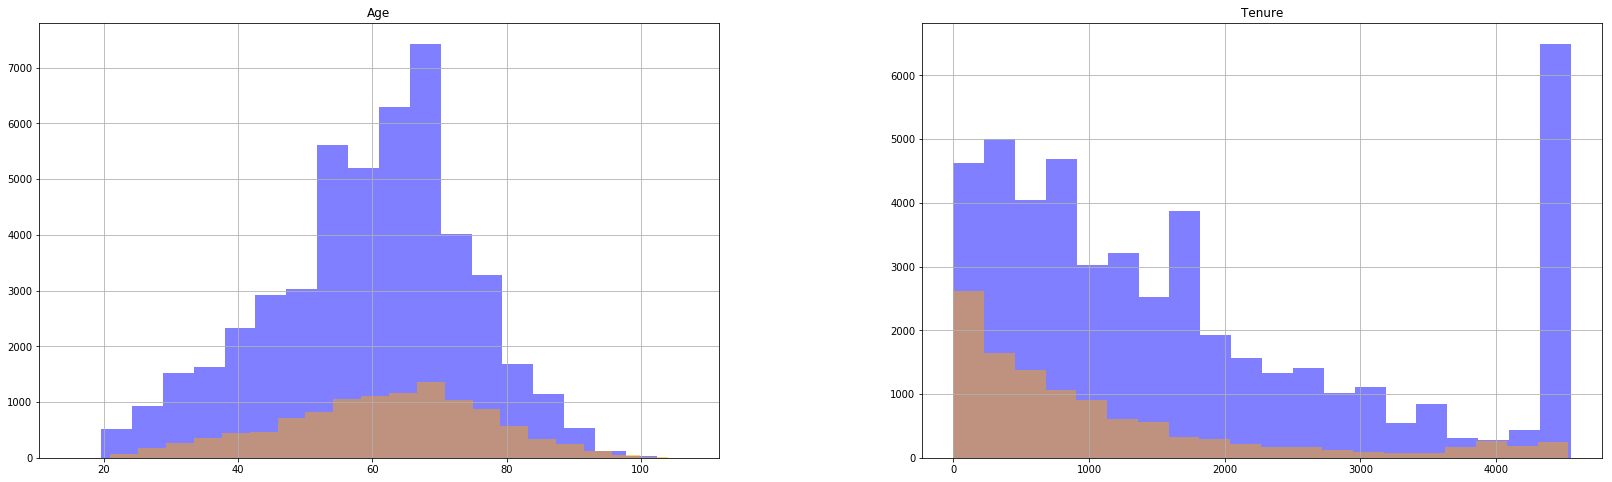

In [37]:
numerical_features = ['Tenure','Age']
fig, ax = plt.subplots(1, 2, figsize=(28, 8))
df[df.churned == 0][numerical_features].hist(bins=20, color="blue", alpha=0.5, ax=ax)
df[df.churned == 1][numerical_features].hist(bins=20, color="orange", alpha=0.5, ax=ax)

When Tenure is greater than 4000 months then there is lot of chance that person will not churn

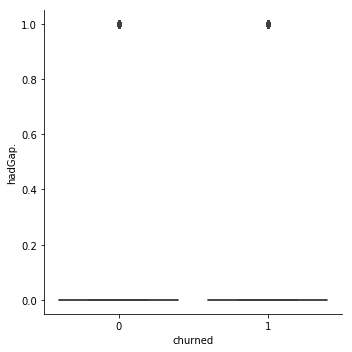

In [38]:
sns.catplot(x="churned", y="hadGap.", kind="box", data=df)

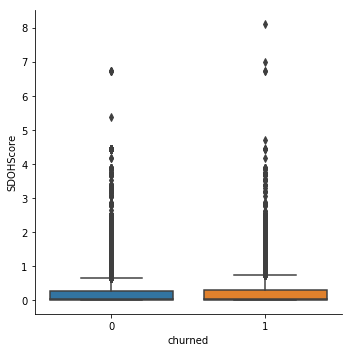

In [39]:
sns.catplot(x="churned", y="SDOHScore", kind="box", data=df)

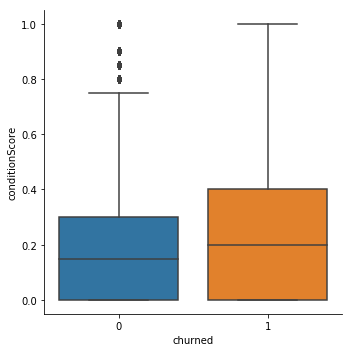

In [40]:
sns.catplot(x="churned", y="conditionScore", kind="box", data=df)

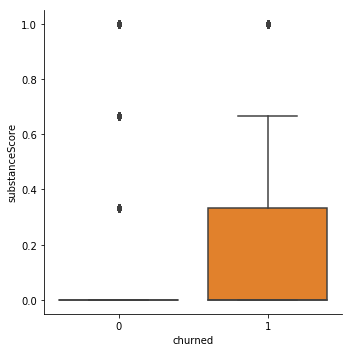

In [41]:
sns.catplot(x="churned", y="substanceScore", kind="box", data=df)

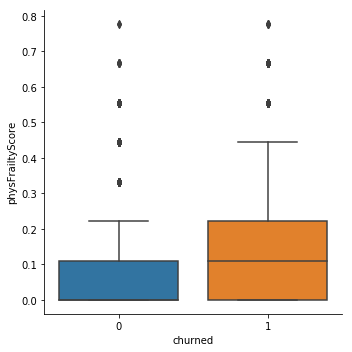

In [42]:
sns.catplot(x="churned", y="physFrailtyScore", kind="box", data=df)

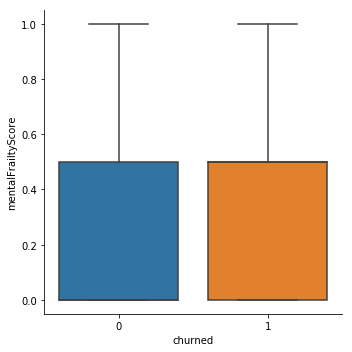

In [43]:
sns.catplot(x="churned", y="mentalFrailtyScore", kind="box", data=df)

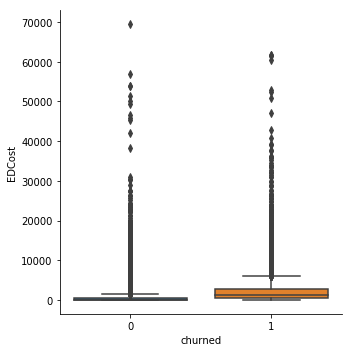

In [44]:
sns.catplot(x="churned", y="EDCost", kind="box", data=df)

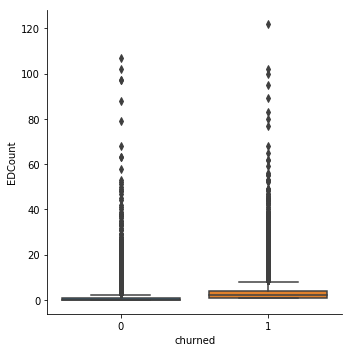

In [45]:
sns.catplot(x="churned", y="EDCount", kind="box", data=df)

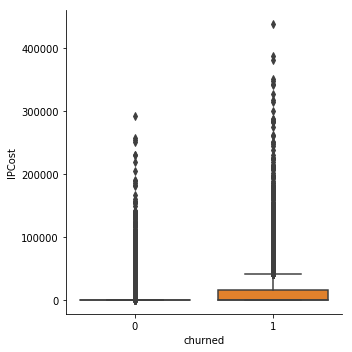

In [46]:
sns.catplot(x="churned", y="IPCost", kind="box", data=df)

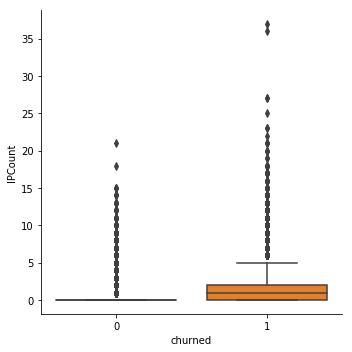

In [47]:
sns.catplot(x="churned", y="IPCount", kind="box", data=df)

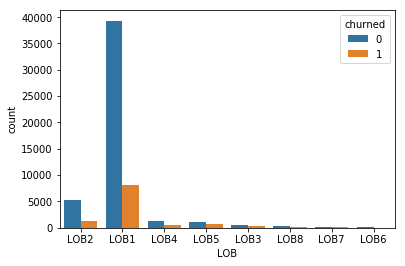

In [48]:
sns.countplot(x='LOB',data=df,hue='churned')

From the plot above, we can see that in categories LOB1 and LOB2, 80% of customers are likely to stay with the company.

In [49]:
age_bucket = df.groupby(pd.cut(df['Age'],bins=[0,10,20,30,40,50,60,70,80,90,100,110]))
age_bucket = round((age_bucket.sum()['churned'] / age_bucket.size())*100 , 2)
age_bucket

Age
(0, 10]         NaN
(10, 20]       0.00
(20, 30]      13.37
(30, 40]      17.97
(40, 50]      17.63
(50, 60]      17.28
(60, 70]      18.18
(70, 80]      21.06
(80, 90]      26.21
(90, 100]     37.77
(100, 110]    32.14
dtype: float64

Text(0.5, 1.0, 'Percentage of people in different Age Groups that exited')

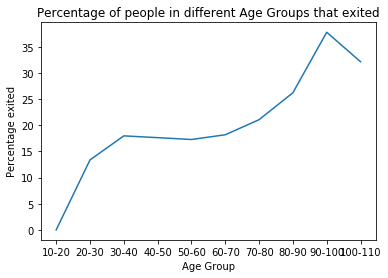

In [50]:
x = [str(i)+"-"+str(i+10) for i in range(0,110,10)]
plt.plot(x,age_bucket.values)
plt.xlabel("Age Group")
plt.ylabel("Percentage exited")
plt.title("Percentage of people in different Age Groups that exited")

Intially people in the age group [10-40] churn, then for age group [40-80], they remain constant and as the age increases after 80 the churn percentage also increases

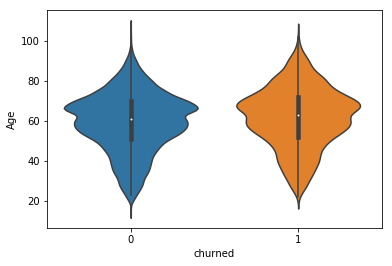

In [51]:
sns.violinplot(x='churned', y='Age', data=df);

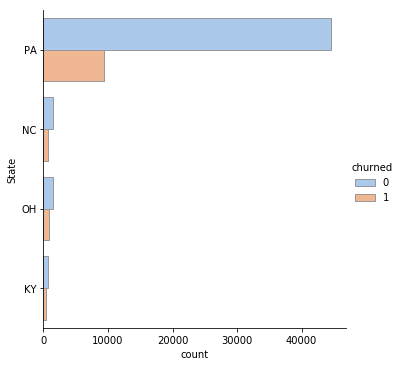

In [52]:
sns.catplot(y="State", hue="churned", kind="count",
            palette="pastel", edgecolor=".6",
            data=df);

In [117]:
df.groupby(['State']).mean()

,churned,Tenure,hadGap.,Age,SDOHScore,conditionScore,substanceScore,physFrailtyScore,mentalFrailtyScore,EDCost,EDCount,IPCost,IPCount
State,,,,,,,,,,,,,
KY,0.298969,546.916589,0.032802,63.181818,0.143825,0.210637,0.099969,0.064147,0.179944,984.313899,1.619494,4129.941978,0.440487
NC,0.315741,567.383333,0.035185,62.480556,0.298115,0.168773,0.100154,0.065432,0.168287,978.086042,1.621759,4157.986514,0.424074
OH,0.371454,579.923759,0.054965,61.733156,0.503519,0.193639,0.096040,0.070577,0.207668,1270.302930,1.873670,4097.187318,0.496897
PA,0.173557,1725.654868,0.110951,59.642235,0.241353,0.190952,0.076684,0.079538,0.233432,937.906522,1.498870,4538.659059,0.498481


In [222]:
df.drop(['MEMBER_ID'],inplace= True, axis=1)
df_final= pd.get_dummies(df, drop_first=True)

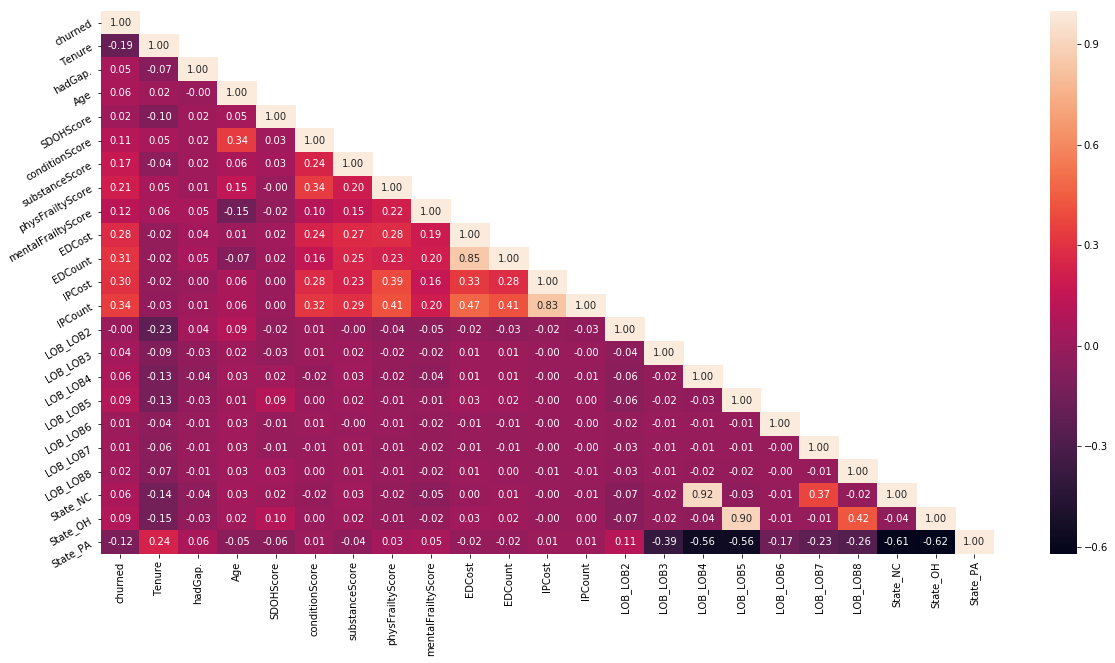

In [224]:

corr = df_final.corr()
corr
plt.figure(figsize=(20,10))

mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask, 1)] = True
a = sns.heatmap(corr,mask=mask, annot=True, fmt='.2f')
rotx = a.set_xticklabels(a.get_xticklabels(), rotation=90)
roty = a.set_yticklabels(a.get_yticklabels(), rotation=30)

Here we can see that Physical and Mental Fratality scores are correlated with IPCount, IPCost, ED Cost and EDCount. This makes sense becasue when you are not physically or mentally fit, then the number of hospital trips as well as cost would increse.

Tenure and churned has negative correlation. This is true because we saw from the data that when number of tenure days is more, then customer is less likely to churn.

Churn has somewhat correlation between IP and ED costs and counts because we saw that the person who visits hospital more, is more likely to leave the insurance company. 

ED Cost and ED Count are 85% correlated. 
Similarly, IP Cost and IP Count are 83% correlated. 

Removing columns which are above 90% correlated

In [225]:
df_final.drop(['LOB_LOB4','LOB_LOB5'], inplace = True, axis =1)

# Multicollinearity

In [226]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(df_final.values, i) for i in range(df_final.shape[1])]
vif["features"] = df_final.columns

In [227]:
vif

,VIF Factor,features
0,1.263337,churned
1,1.205144,Tenure
2,1.018914,hadGap.
3,1.231486,Age
4,1.025651,SDOHScore
5,1.362792,conditionScore
6,1.165206,substanceScore
7,1.353066,physFrailtyScore
8,1.140860,mentalFrailtyScore
9,4.064281,EDCost


Since there is only one variable that has VIF >5, we will remove that

In [228]:
df_final.drop(['State_PA'], inplace = True, axis = 1)

In [229]:
df_final.head()

,churned,Tenure,hadGap.,Age,SDOHScore,conditionScore,substanceScore,physFrailtyScore,mentalFrailtyScore,EDCost,EDCount,IPCost,IPCount,LOB_LOB2,LOB_LOB3,LOB_LOB6,LOB_LOB7,LOB_LOB8,State_NC,State_OH
0,0,49,0,59,0.018738,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,0,0,0,0,0,0
1,0,49,0,80,0.012270,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0
2,0,49,0,45,0.000435,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0
3,0,49,0,25,0.033174,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,1,0
4,0,49,0,66,0.405166,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,1


# Creating Dummy Variables and Standardizing the data

In [230]:
df.columns

Index(['LOB', 'churned', 'Tenure', 'hadGap.', 'Age', 'SDOHScore',
       'conditionScore', 'substanceScore', 'physFrailtyScore',
       'mentalFrailtyScore', 'EDCost', 'EDCount', 'IPCost', 'IPCount',
       'State'],
      dtype='object')

In [431]:

df_final_X = df_final.drop(['churned'],axis =1)
df_final_Y = df_final['churned']
#df_final_X=(df_final_X-df_final_X.mean())/df_final_X.std()

# numerical features
num_cols = ['Tenure','Age','SDOHScore','conditionScore','substanceScore','physFrailtyScore','EDCost','EDCount','IPCost','IPCount']

# apply standardization on numerical features
for i in num_cols:
    
    # fit on training data column
    scale = StandardScaler().fit(df_final_X[[i]])
    df_final_X[i] = scale.transform(df_final_X[[i]])
#df_final_X = df_final_X/df_final_X.max()

df_final_X.head()


,Tenure,hadGap.,Age,SDOHScore,conditionScore,substanceScore,physFrailtyScore,mentalFrailtyScore,EDCost,EDCount,IPCost,IPCount,LOB_LOB2,LOB_LOB3,LOB_LOB6,LOB_LOB7,LOB_LOB8,State_NC,State_OH
0,-1.110542,0,-0.059842,-0.464426,-0.869158,-0.507276,-0.744768,0.0,-0.409801,-0.444491,-0.27492,-0.33293,1,0,0,0,0,0,0
1,-1.110542,0,1.355102,-0.477324,-0.869158,-0.507276,-0.744768,0.0,-0.409801,-0.444491,-0.27492,-0.33293,0,0,0,0,0,0,0
2,-1.110542,0,-1.003138,-0.500927,-0.869158,-0.507276,-0.744768,0.0,-0.409801,-0.444491,-0.27492,-0.33293,0,0,0,0,0,0,0
3,-1.110542,0,-2.350704,-0.435635,-0.869158,-0.507276,-0.744768,0.0,-0.409801,-0.444491,-0.27492,-0.33293,0,0,0,0,0,1,0
4,-1.110542,0,0.411806,0.306243,-0.869158,-0.507276,-0.744768,0.0,-0.409801,-0.444491,-0.27492,-0.33293,0,0,0,0,0,0,1


In [432]:
df_final_X.describe()

,Tenure,hadGap.,Age,SDOHScore,conditionScore,substanceScore,physFrailtyScore,mentalFrailtyScore,EDCost,EDCount,IPCost,IPCount,LOB_LOB2,LOB_LOB3,LOB_LOB6,LOB_LOB7,LOB_LOB8,State_NC,State_OH
count,5.947100e+04,59471.000000,5.947100e+04,5.947100e+04,5.947100e+04,5.947100e+04,5.947100e+04,59471.000000,5.947100e+04,5.947100e+04,5.947100e+04,5.947100e+04,59471.000000,59471.000000,59471.000000,59471.000000,59471.000000,59471.000000,59471.000000
mean,3.112134e-14,0.104673,-9.856121e-16,-1.190603e-15,-2.686241e-14,-7.404617e-15,-5.627528e-14,0.229128,-2.859517e-15,-9.771199e-15,-2.805067e-14,-4.134504e-14,0.109616,0.015150,0.002791,0.005179,0.007029,0.036320,0.037934
std,1.000008e+00,0.306134,1.000008e+00,1.000008e+00,1.000008e+00,1.000008e+00,1.000008e+00,0.250560,1.000008e+00,1.000008e+00,1.000008e+00,1.000008e+00,0.312414,0.122151,0.052759,0.071779,0.083543,0.187087,0.191039
min,-1.145203e+00,0.000000,-3.024486e+00,-5.017953e-01,-8.691577e-01,-5.072761e-01,-7.447676e-01,0.000000,-4.098008e-01,-4.444910e-01,-2.749201e-01,-3.329299e-01,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,-7.893995e-01,0.000000,-5.988681e-01,-4.944444e-01,-8.691577e-01,-5.072761e-01,-7.447676e-01,0.000000,-4.098008e-01,-4.444910e-01,-2.749201e-01,-3.329299e-01,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,-3.140516e-01,0.000000,7.491474e-02,-4.401479e-01,-1.851453e-01,-5.072761e-01,-7.447676e-01,0.000000,-3.883174e-01,-1.520080e-01,-2.749201e-01,-3.329299e-01,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,5.248809e-01,0.000000,6.813193e-01,3.321687e-02,4.988671e-01,-5.072761e-01,3.106097e-01,0.500000,4.009483e-03,1.404751e-01,-2.749201e-01,-3.329299e-01,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,2.074713e+00,1.000000,3.174316e+00,1.568313e+01,3.690925e+00,5.939383e+00,6.642874e+00,1.000000,2.952045e+01,3.523844e+01,2.653319e+01,2.456893e+01,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


#  Logistic Regression

In [375]:
#from imblearn.over_sampling import SMOTE, ADASYN
#from imblearn.under_sampling import RandomUnderSampler
#from imblearn.pipeline import Pipeline
#X_resampled, y_resampled = ADASYN().fit_resample(df_final_X, df_final_Y)

#over = SMOTE(sampling_strategy=0.6)
#under = RandomUnderSampler(sampling_strategy=0.5)
#steps = [('o', over), ('u', under)]
#steps = [('u', under)]
#pipeline = Pipeline(steps=steps)

# transform the dataset
#X_resampled, y_resampled = pipeline.fit_resample(df_final_X, df_final_Y)


In [433]:

import statsmodels.api as sm
logit_model=sm.Logit(df_final_Y,df_final_X)
result=logit_model.fit()
print(result.summary2())

Optimization terminated successfully.
         Current function value: 0.483173
         Iterations 7
                          Results: Logit
Model:                Logit            Pseudo R-squared: 0.002     
Dependent Variable:   churned          AIC:              57507.6065
Date:                 2020-07-27 11:51 BIC:              57678.4781
No. Observations:     59471            Log-Likelihood:   -28735.   
Df Model:             18               LL-Null:          -28785.   
Df Residuals:         59452            LLR p-value:      2.8452e-13
Converged:            1.0000           Scale:            1.0000    
No. Iterations:       7.0000                                       
-------------------------------------------------------------------
                    Coef.  Std.Err.    z     P>|z|   [0.025  0.975]
-------------------------------------------------------------------
Tenure             -0.5419   0.0122 -44.5180 0.0000 -0.5657 -0.5180
hadGap.            -0.6178   0.0358 -17.2

Positive sign of coeffiecent indicates that when increasing the variable, would increase the chances of customer churning.

Removing columns which are not statistically significant

In [378]:
df_final_X.drop(['LOB_LOB7'], inplace = True, axis =1)

In [379]:
logit_model=sm.Logit(df_final_Y,df_final_X)
result=logit_model.fit()
print(result.summary2())

Optimization terminated successfully.
         Current function value: 0.483198
         Iterations 7
                          Results: Logit
Model:                Logit            Pseudo R-squared: 0.002     
Dependent Variable:   churned          AIC:              57508.5035
Date:                 2020-07-26 23:50 BIC:              57670.3819
No. Observations:     59471            Log-Likelihood:   -28736.   
Df Model:             17               LL-Null:          -28785.   
Df Residuals:         59453            LLR p-value:      3.9281e-13
Converged:            1.0000           Scale:            1.0000    
No. Iterations:       7.0000                                       
-------------------------------------------------------------------
                    Coef.  Std.Err.    z     P>|z|   [0.025  0.975]
-------------------------------------------------------------------
Tenure             -0.5417   0.0122 -44.5057 0.0000 -0.5656 -0.5178
hadGap.            -0.6182   0.0358 -17.2

In [380]:
from sklearn.model_selection import train_test_split

train_data_X, test_data_X, train_data_Y, test_data_Y = train_test_split(df_final_X, df_final_Y, test_size = 0.2, random_state =100)


# Logistic Regression

In [381]:
from sklearn.linear_model import LogisticRegression

clf = LogisticRegression(random_state=0).fit(train_data_X, train_data_Y)
clf.score(train_data_X, train_data_Y)

0.8416428451319993

In [382]:
pred_test = clf.predict(test_data_X)
clf.score(test_data_X, test_data_Y)

0.8379991593106347

In [383]:
from sklearn.metrics import confusion_matrix
confusion_matrix(test_data_Y, pred_test)

array([[9335,  291],
       [1636,  633]])

In [384]:
report = classification_report(pred_test,test_data_Y, target_names = ['No','Yes'], output_dict=True)
df_report = pd.DataFrame(report)
df_report

,No,Yes,accuracy,macro avg,weighted avg
precision,0.969769,0.278978,0.837999,0.624373,0.916109
recall,0.850880,0.685065,0.837999,0.767972,0.837999
f1-score,0.906443,0.396492,0.837999,0.651468,0.866830
support,10971.000000,924.000000,0.837999,11895.000000,11895.000000


A macro-average will compute the metric independently for each class and then take the average (hence treating all classes equally), whereas a micro-average will aggregate the contributions of all classes to compute the average metric. 

In [385]:
pred_test = clf.predict_proba(test_data_X)

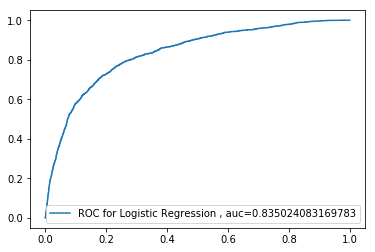

In [386]:
from sklearn import metrics
y_pred_proba = clf.predict_proba(test_data_X)[::,1]
fpr, tpr, _ = metrics.roc_curve(test_data_Y,  y_pred_proba)
auc = metrics.roc_auc_score(test_data_Y, y_pred_proba)
plt.plot(fpr,tpr,label="ROC for Logistic Regression , auc="+str(auc))
plt.legend(loc=4)
plt.show()

# Random Forest

In [391]:
from sklearn.model_selection import train_test_split

train_data, test_data = train_test_split(df_final, test_size = 0.2, random_state =100)
train_data.head()

train_data_X = train_data.drop(['churned'], axis =1)
train_data_Y = train_data['churned']
#print(train_data_Y.head())
#print(train_data_X.head())
test_data_X = test_data.drop(['churned'], axis =1)
test_data_Y = test_data['churned']

In [392]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

n_estimators = [300, 500, 800]
max_depth = [8, 15, 25]
min_samples_split = [5, 10, 15]
min_samples_leaf = [10, 50] 
estimator= RandomForestClassifier()
hyperF = dict(n_estimators = n_estimators, max_depth = max_depth,  
              min_samples_split = min_samples_split, 
             min_samples_leaf = min_samples_leaf)

gridF = GridSearchCV(estimator, hyperF, cv = 3, verbose = 1, 
                      n_jobs = -1)
bestF = gridF.fit(train_data_X, train_data_Y)

Fitting 3 folds for each of 54 candidates, totalling 162 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed:   44.0s
[Parallel(n_jobs=-1)]: Done 162 out of 162 | elapsed:  6.5min finished


Some Key points to remember while choosing hyper parameters of Random Forest, to avoid Overfitting:
    1. n_estimators- The more the number of trees, the less likely the model is to overfit. So we should increase the number of trees to increase diversity
    2. max_features - Try decreasing this number. The more option we will give to the tree, the tree will pick the same predictor for spitting. So same kind of trees will be used always
    3. Max_depth - This paramter will reduce the complexity of the learned models, lowering overfitting risk.
    4. Min_samples_leaf- Make sure it is greater than one. 

In [393]:
pred_train = bestF.predict(train_data_X)
accuracy_train = accuracy_score(pred_train,train_data_Y)
accuracy_train

0.905834874726753

In [394]:
pred_test = bestF.predict(test_data_X)
accuracy_test = accuracy_score(pred_test,test_data_Y)
accuracy_test

0.8685161832702817

In [395]:
print(bestF.best_params_)

{'max_depth': 25, 'min_samples_leaf': 10, 'min_samples_split': 15, 'n_estimators': 500}


In [396]:
print("Grid scores on development set:")
print()
means = bestF.cv_results_['mean_test_score']
stds = bestF.cv_results_['std_test_score']
for mean, std, params in zip(means, stds, bestF.cv_results_['params']):
    print("%0.3f (+/-%0.03f) for %r"% (mean, std * 2, params))
    print()

Grid scores on development set:

0.862 (+/-0.004) for {'max_depth': 8, 'min_samples_leaf': 10, 'min_samples_split': 5, 'n_estimators': 300}

0.862 (+/-0.003) for {'max_depth': 8, 'min_samples_leaf': 10, 'min_samples_split': 5, 'n_estimators': 500}

0.863 (+/-0.003) for {'max_depth': 8, 'min_samples_leaf': 10, 'min_samples_split': 5, 'n_estimators': 800}

0.862 (+/-0.003) for {'max_depth': 8, 'min_samples_leaf': 10, 'min_samples_split': 10, 'n_estimators': 300}

0.863 (+/-0.003) for {'max_depth': 8, 'min_samples_leaf': 10, 'min_samples_split': 10, 'n_estimators': 500}

0.862 (+/-0.003) for {'max_depth': 8, 'min_samples_leaf': 10, 'min_samples_split': 10, 'n_estimators': 800}

0.862 (+/-0.002) for {'max_depth': 8, 'min_samples_leaf': 10, 'min_samples_split': 15, 'n_estimators': 300}

0.863 (+/-0.003) for {'max_depth': 8, 'min_samples_leaf': 10, 'min_samples_split': 15, 'n_estimators': 500}

0.862 (+/-0.002) for {'max_depth': 8, 'min_samples_leaf': 10, 'min_samples_split': 15, 'n_estimato

In [397]:
report = classification_report(pred_test,test_data_Y, target_names = ['No','Yes'], output_dict=True)
df_report = pd.DataFrame(report).transpose()
df_report

,precision,recall,f1-score,support
No,0.955745,0.889921,0.921659,10338.000000
Yes,0.498457,0.726397,0.591218,1557.000000
accuracy,0.868516,0.868516,0.868516,0.868516
macro avg,0.727101,0.808159,0.756438,11895.000000
weighted avg,0.895888,0.868516,0.878406,11895.000000


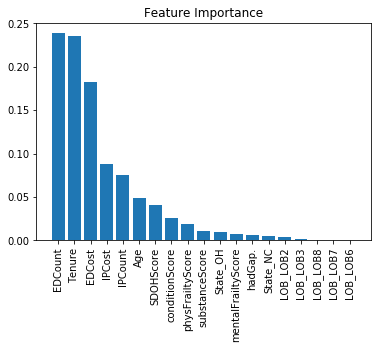

In [398]:
importances = bestF.best_estimator_.feature_importances_
# Sort feature importances in descending order
indices = np.argsort(importances)[::-1]

# Rearrange feature names so they match the sorted feature importances
names = [train_data_X.columns[i] for i in indices]

# Create plot
plt.figure()

# Create plot title
plt.title("Feature Importance")

# Add bars
plt.bar(range(train_data_X.shape[1]), importances[indices])

# Add feature names as x-axis labels
plt.xticks(range(train_data_X.shape[1]), names, rotation=90)

# Show plot
plt.show()

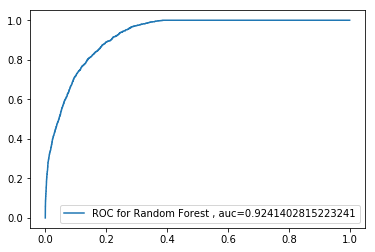

In [399]:
from sklearn import metrics
y_pred_proba = bestF.predict_proba(test_data_X)[::,1]
fpr, tpr, _ = metrics.roc_curve(test_data_Y,  y_pred_proba)
auc = metrics.roc_auc_score(test_data_Y, y_pred_proba)
plt.plot(fpr,tpr,label="ROC for Random Forest , auc="+str(auc))
plt.legend(loc=4)
plt.show()

# Model Comparision

We now have to decide which model is better. 

There are 2 criterias, I will follow:
    1. First find out Precision is more important or Recall
    2. Area Under the Curve

Precision Vs Recall

If a customer who is not likely to churn and our model predicts that customer will churn & accordingly we send them offers/deals. So even if that customer receives this marketing message, we should be less corned about that. This is precision. How many predicted churn customers will actually churn

If we are missing out on customers who will churn and do not send them offers then that would be more crucial in our case. This is Recall. Recall is basically finding out how many of the customers who will actually churn, did we find out correctly. 

ROC curve makes it easy to identify the best threshold value for making a decision.
AUC curve can help us find out which model is better, because it doesn't worry about the threshold value that we choose to make decision. 

First based on AUC, definetly Random Forest performed better than Logistic Regression.

Next, we can see precision, recall values for different thresholds and then can choose the most with the highest recall value

# Observation

The number of visits to the hospital or the cost incured by the insurance company for the employee, tenure with the company are the most prominent features in estimating whether a customer will churn or not.

Suprisingly, location does not play a major role in estimating the churn ratio.

Also, Age, condition score, number of hospital visits are somewhat correlated. 

Random Forest advantages:
    1. Can handle outliers
    2. Implicitly does feature selection

In [402]:
confusion_matrix(test_data_Y, pred_test)

array([[9200,  426],
       [1138, 1131]])

In [427]:
df_data1 = pd.concat([test_data_X,test_data_Y], axis =1)

In [428]:
df_data2 = pd.concat([df_data1,pd.Series(y_pred_proba, index = test_data_Y.index)], axis =1)
df_data2 = df_data2.rename(columns={0:'pred_churn'})
df_data2.head()

,Tenure,hadGap.,Age,SDOHScore,conditionScore,substanceScore,physFrailtyScore,mentalFrailtyScore,EDCost,EDCount,...,IPCount,LOB_LOB2,LOB_LOB3,LOB_LOB6,LOB_LOB7,LOB_LOB8,State_NC,State_OH,churned,pred_churn
66644,1661,1,80,0.372665,0.30,0.0,0.000000,0.0,2345.2,1.0,...,0.0,0,0,0,0,0,0,0,0,0.119292
2700,200,0,85,0.551966,0.35,0.0,0.111111,0.0,0.0,0.0,...,0.0,0,0,0,0,0,0,0,0,0.001286
17750,748,0,74,0.167148,0.35,0.0,0.000000,0.0,0.0,0.0,...,0.0,0,0,0,0,0,0,0,0,0.000514
15021,626,0,53,0.113066,0.00,0.0,0.000000,0.0,0.0,0.0,...,0.0,0,0,0,0,0,0,0,0,0.000209
7102,353,0,33,0.006363,0.00,0.0,0.111111,0.5,233.3,2.0,...,0.0,0,0,0,0,0,0,0,0,0.390262
